In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
from CSIKit.reader import get_reader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pywt


In [2]:
csv_dir='csi_csv/'
filenames = [f[:-4] for f in listdir(csv_dir)
    if isfile(join(csv_dir, f))]
actions={}
actionfiles={}
for f in filenames:
    ff=f[:-11]
    if ff not in actions.keys():
        actions[ff]=1
        actionfiles[ff]=[f]
    else:
        actions[ff]+=1
        actionfiles[ff]+= [f]
print(actions)

{'brushteeth': 100, 'cook': 100, 'drink': 65, 'getintobed': 100, 'nothing': 100, 'petcat': 2, 'sitdown_chair': 51, 'sitdown_sofa': 55, 'sleeping': 100, 'standup_chair': 50, 'standup_sofa': 55, 'test': 3, 'walk': 97, 'washingdishes': 100}


importing dataframes

In [3]:
dfs={}
for a in actions.keys():
    print(a)
    dfs[a]=[]
    for f in actionfiles[a]:
        dfs[a].append(pd.read_csv(join(csv_dir,f+".csv")))
dfs[a][-1]

brushteeth
cook
drink
getintobed
nothing
petcat
sitdown_chair
sitdown_sofa
sleeping
standup_chair
standup_sofa
test
walk
washingdishes


0          1          2          3          4          5  \
0   -39.974250 -44.421902 -56.530436 -49.540736 -50.509836 -46.423197   
1   -50.522500 -44.434566 -52.563700 -59.553400 -49.553400 -50.010975   
2   -44.689419 -44.413584 -49.532417 -55.553017 -50.238228 -39.098794   
3   -47.933366 -44.428212 -43.526446 -47.505846 -53.014921 -50.252857   
4   -46.012607 -44.415598 -56.524132 -47.229943 -49.992007 -43.406593   
..         ...        ...        ...        ...        ...        ...   
333 -43.259888 -44.424944 -46.533477 -59.543777 -37.841160 -48.404344   
334 -48.396406 -44.417006       -inf -51.406706 -46.014014 -51.406706   
335 -44.159595 -44.603786 -55.743220 -43.438731 -53.702020 -46.712320   
336 -40.828060 -44.430789 -44.234833 -55.570222 -52.559923 -43.265733   
337 -46.869287 -44.422170 -53.520404 -43.008879 -40.246814 -39.695731   

             6          7          8          9  ...        246        247  \
0   -12.491599  -9.243774  -7.514913  -5.720241  ... -15.150411 -10.886083   
1   -12.423159  -9.299256  -7.509025  -5.598170  ... -15.195912 -11.467982   
2   -12.812132  -9.433810  -7.143680  -5.428112  ... -15.313007 -11.373984   
3   -13.736371 -10.243211  -7.189237  -5.339100  ... -13.989513 -10.324516   
4   -12.564930  -9.648085  -7.829277  -5.645528  ... -15.283656 -11.227744   
..         ...        ...        ...        ...  ...        ...        ...   
333 -13.177594  -9.400378  -6.767949  -5.138426  ... -13.737892 -10.414732   
334 -12.799319  -9.560818  -6.818539  -5.282845  ... -13.714069 -10.429568   
335 -46.605081 -53.190495 -46.712320 -48.583186  ... -24.326841 -17.808669   
336 -12.267952  -9.530534  -7.041399  -5.451475  ... -14.677037 -10.606545   
337 -13.121902  -9.728346  -6.914547  -5.477339  ... -13.956018 -10.232277   

           248        249        250        251        252        253  \
0    -7.970825  -5.884312  -4.779233 -62.551036 -41.906456 -40.592039   
1    -8.343303  -6.081144  -4.974641 -43.990375 -45.661739 -41.424266   
2    -8.247504  -6.179634  -4.797722 -55.553017 -47.491217 -41.573617   
3    -7.759693  -6.179357  -5.065659 -46.994321 -42.387013 -42.689629   
4    -8.079981  -5.909136  -4.903000 -46.012607 -46.416893 -44.415598   
..         ...        ...        ...        ...        ...        ...   
333  -7.931176  -6.417921  -5.163467 -49.543777 -43.920849 -49.543777   
334  -7.861189  -6.460013  -5.201198 -42.015355 -48.566739 -42.502926   
335 -27.624790 -21.367934 -18.853152 -20.772540 -17.031929 -48.108940   
336  -8.109660  -6.172615  -5.095691 -42.692205 -47.245133 -40.828060   
337  -7.648909  -6.438214  -5.167542 -47.236514 -50.246815 -46.988279   

           254        255  
0   -45.561336 -53.008611  
1   -48.413967 -40.831837  
2   -50.501517 -43.048817  
3   -45.314587 -48.407612  
4   -48.565332 -52.544732  
..         ...        ...  
333 -48.404344 -48.404344  
334 -45.556439 -44.911860  
335 -48.753520 -45.743220  
336 -39.704349 -48.580522  
337 -40.819441 -48.571904  

[338 rows x 256 columns]

DotPlot

In [4]:
dfs_copy=dfs

brushteeth
cook
drink
getintobed
nothing
petcat
sitdown_chair
sitdown_sofa
sleeping
standup_chair
standup_sofa
test
walk
washingdishes


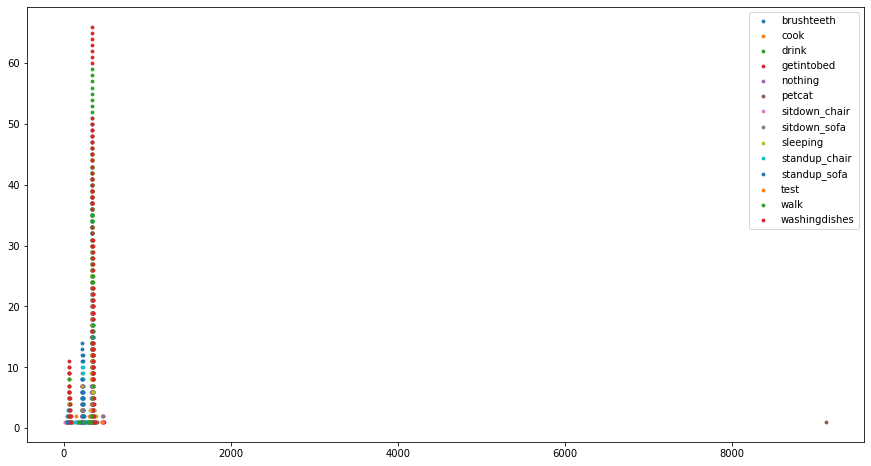

In [5]:
plt.figure(figsize=(15,8))
counts_for_lengths={}
plot_x={}
plot_y={}
for a in actions.keys():
    plot_x[a]=[]
    plot_y[a]=[]
    for df in dfs[a]:
        x=df.shape[0]
        if x not in counts_for_lengths.keys():
            counts_for_lengths[x]=1
            y=1
        else:
            y=counts_for_lengths[x]+1
            counts_for_lengths[x]+=1
        plot_x[a].append(x)
        plot_y[a].append(y)
    print(a)
    plt.scatter(plot_x[a],plot_y[a],label=a,s=8)

plt.legend()
plt.show()

DotPlot without petcat

brushteeth
cook
drink
getintobed
nothing
sitdown_chair
sitdown_sofa
sleeping
standup_chair
standup_sofa
test
walk
washingdishes


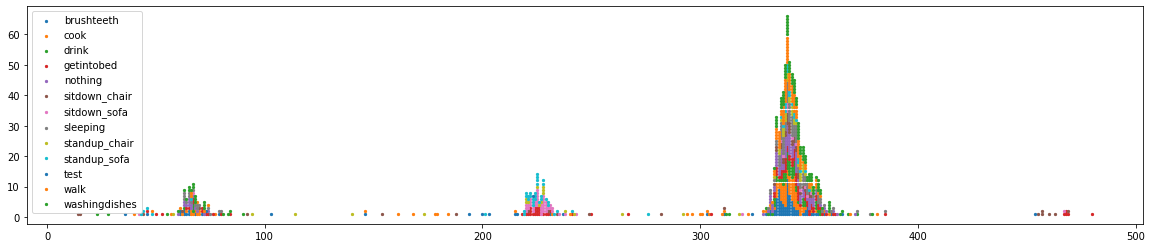

In [6]:
plt.figure(figsize=(20,4))
counts_for_lengths={}
plot_x={}
plot_y={}
for a in actions.keys():
    if a=='petcat':
        continue
    plot_x[a]=[]
    plot_y[a]=[]
    for df in dfs[a]:
        x=df.shape[0]
        if x not in counts_for_lengths.keys():
            counts_for_lengths[x]=1
            y=1
        else:
            y=counts_for_lengths[x]+1
            counts_for_lengths[x]+=1
        plot_x[a].append(x)
        plot_y[a].append(y)
    print(a)
    plt.scatter(plot_x[a],plot_y[a],label=a,s=5)

plt.legend()
plt.show()

Replacing NaNs and INFs

In [7]:
dfs_={}
for action in dfs.keys():
    dfs_[action]=[]
    i=0
    for df in dfs[action]:
        df_=df.replace(np.inf,np.nan,inplace=False)
        df_.replace(-np.inf,np.nan,inplace=True)
        df_.fillna(df_.mean(),inplace=True)
        if np.isnan(df_).values.sum()>0:
            i+=1
        else:
            dfs_[action].append(df_)
    print(action,i)
dfs_[action][-1]

brushteeth 0
cook 0
drink 0
getintobed 89
nothing 0
petcat 0
sitdown_chair 11
sitdown_sofa 0
sleeping 0
standup_chair 12
standup_sofa 0
test 1
walk 0
washingdishes 0


0          1          2          3          4          5  \
0   -39.974250 -44.421902 -56.530436 -49.540736 -50.509836 -46.423197   
1   -50.522500 -44.434566 -52.563700 -59.553400 -49.553400 -50.010975   
2   -44.689419 -44.413584 -49.532417 -55.553017 -50.238228 -39.098794   
3   -47.933366 -44.428212 -43.526446 -47.505846 -53.014921 -50.252857   
4   -46.012607 -44.415598 -56.524132 -47.229943 -49.992007 -43.406593   
..         ...        ...        ...        ...        ...        ...   
333 -43.259888 -44.424944 -46.533477 -59.543777 -37.841160 -48.404344   
334 -48.396406 -44.417006 -49.109729 -51.406706 -46.014014 -51.406706   
335 -44.159595 -44.603786 -55.743220 -43.438731 -53.702020 -46.712320   
336 -40.828060 -44.430789 -44.234833 -55.570222 -52.559923 -43.265733   
337 -46.869287 -44.422170 -53.520404 -43.008879 -40.246814 -39.695731   

             6          7          8          9  ...        246        247  \
0   -12.491599  -9.243774  -7.514913  -5.720241  ... -15.150411 -10.886083   
1   -12.423159  -9.299256  -7.509025  -5.598170  ... -15.195912 -11.467982   
2   -12.812132  -9.433810  -7.143680  -5.428112  ... -15.313007 -11.373984   
3   -13.736371 -10.243211  -7.189237  -5.339100  ... -13.989513 -10.324516   
4   -12.564930  -9.648085  -7.829277  -5.645528  ... -15.283656 -11.227744   
..         ...        ...        ...        ...  ...        ...        ...   
333 -13.177594  -9.400378  -6.767949  -5.138426  ... -13.737892 -10.414732   
334 -12.799319  -9.560818  -6.818539  -5.282845  ... -13.714069 -10.429568   
335 -46.605081 -53.190495 -46.712320 -48.583186  ... -24.326841 -17.808669   
336 -12.267952  -9.530534  -7.041399  -5.451475  ... -14.677037 -10.606545   
337 -13.121902  -9.728346  -6.914547  -5.477339  ... -13.956018 -10.232277   

           248        249        250        251        252        253  \
0    -7.970825  -5.884312  -4.779233 -62.551036 -41.906456 -40.592039   
1    -8.343303  -6.081144  -4.974641 -43.990375 -45.661739 -41.424266   
2    -8.247504  -6.179634  -4.797722 -55.553017 -47.491217 -41.573617   
3    -7.759693  -6.179357  -5.065659 -46.994321 -42.387013 -42.689629   
4    -8.079981  -5.909136  -4.903000 -46.012607 -46.416893 -44.415598   
..         ...        ...        ...        ...        ...        ...   
333  -7.931176  -6.417921  -5.163467 -49.543777 -43.920849 -49.543777   
334  -7.861189  -6.460013  -5.201198 -42.015355 -48.566739 -42.502926   
335 -27.624790 -21.367934 -18.853152 -20.772540 -17.031929 -48.108940   
336  -8.109660  -6.172615  -5.095691 -42.692205 -47.245133 -40.828060   
337  -7.648909  -6.438214  -5.167542 -47.236514 -50.246815 -46.988279   

           254        255  
0   -45.561336 -53.008611  
1   -48.413967 -40.831837  
2   -50.501517 -43.048817  
3   -45.314587 -48.407612  
4   -48.565332 -52.544732  
..         ...        ...  
333 -48.404344 -48.404344  
334 -45.556439 -44.911860  
335 -48.753520 -45.743220  
336 -39.704349 -48.580522  
337 -40.819441 -48.571904  

[338 rows x 256 columns]

Data normalization

In [8]:
dfs__={}
for action in dfs_.keys():
    dfs__[action]=[]
    for df_ in dfs_[action]:
        dfs__[action].append(pd.DataFrame(StandardScaler().fit_transform(df_)))
    print(action)
dfs__[action][-1]

brushteeth
cook
drink
getintobed
nothing
petcat
sitdown_chair
sitdown_sofa
sleeping
standup_chair
standup_sofa
test
walk
washingdishes


0         1             2         3         4         5         6    \
0    1.626238  0.199839 -1.473404e+00 -0.264992 -0.596473  0.160401  0.360380   
1   -1.472511 -0.090555 -6.857963e-01 -2.219461 -0.403161 -0.527377  0.367141   
2    0.241068  0.390590 -8.392598e-02 -1.438587 -0.541576  1.564493  0.328710   
3   -0.711903  0.055146  1.108578e+00  0.132218 -1.102792 -0.573746  0.237394   
4   -0.147644  0.344395 -1.472152e+00  0.186075 -0.491811  0.738686  0.353134   
..        ...       ...           ...       ...       ...       ...       ...   
333  0.661020  0.130096  5.115227e-01 -2.217582  1.964076 -0.219385  0.292602   
334 -0.847930  0.312117 -1.410804e-15 -0.629228  0.312207 -0.794940  0.329976   
335  0.396714 -3.970847 -1.317100e+00  0.926118 -1.241666  0.104977 -3.010089   
336  1.375416 -0.003937  9.679254e-01 -1.441946 -1.010829  0.765689  0.382476   
337 -0.399310  0.193696 -8.757528e-01  1.010025  1.477854  1.450060  0.298104   

          7         8         9    ...       246       247       248  \
0    0.354910  0.298444  0.298476  ...  0.219790  0.273677  0.299755   
1    0.349936  0.298945  0.308190  ...  0.214367  0.217307  0.266277   
2    0.337874  0.330064  0.321723  ...  0.200410  0.226413  0.274888   
3    0.265314  0.326184  0.328806  ...  0.358159  0.328078  0.318732   
4    0.318665  0.271667  0.304422  ...  0.203908  0.240580  0.289944   
..        ...       ...       ...  ...       ...       ...       ...   
333  0.340871  0.362068  0.344775  ...  0.388150  0.319338  0.303319   
334  0.326488  0.357759  0.333283  ...  0.390989  0.317901  0.309609   
335 -3.584739 -3.040257 -3.112391  ... -0.873959 -0.396933 -1.466727   
336  0.329203  0.338776  0.319864  ...  0.276212  0.300757  0.287277   
337  0.311470  0.349581  0.317806  ...  0.362151  0.337013  0.328689   

          249       250       251       252       253       254       255  
0    0.315869  0.315585 -2.521266  0.854056  1.132083  0.384331 -0.699806  
1    0.298593  0.298926  0.496385  0.230980  0.965429 -0.149100  1.771615  
2    0.289948  0.314008 -1.383506 -0.072567  0.935521 -0.539464  1.321653  
3    0.289973  0.291166  0.007994  0.774322  0.712039  0.430472  0.234022  
4    0.313690  0.305033  0.167604  0.105685  0.366412 -0.177405 -0.605656  
..        ...       ...       ...       ...       ...       ...       ...  
333  0.269034  0.282828 -0.406505  0.519828 -0.660511 -0.147301  0.234685  
334  0.265339  0.279612  0.817490 -0.251017  0.749426  0.385247  0.943526  
335 -1.043152 -0.884233  4.271215  4.981235 -0.373183 -0.212595  0.774792  
336  0.290564  0.288606  0.707446 -0.031737  1.084820  1.479565  0.198927  
337  0.267252  0.282481 -0.031383 -0.529775 -0.148770  1.271047  0.200677  

[338 rows x 256 columns]

Splitting data to train and test

In [9]:
train={}
test={}
test_part=0.3

for action in dfs__.keys():  
    i=int(len(dfs__[action])*(1-test_part)+0.5)
    train[action]=dfs__[action][:i]
    test[action]=dfs__[action][i:]
    print(action,len(dfs__[action]),len(train[action]),len(test[action]))
train[action][-1]

brushteeth 100 70 30
cook 100 70 30
drink 65 46 19
getintobed 11 8 3
nothing 100 70 30
petcat 2 1 1
sitdown_chair 40 28 12
sitdown_sofa 55 39 16
sleeping 100 70 30
standup_chair 38 27 11
standup_sofa 55 39 16
test 2 1 1
walk 97 68 29
washingdishes 100 70 30


0         1             2             3             4         5    \
0    0.433662  0.194910 -3.409872e-01 -1.184048e-02 -2.044042e+00 -0.407985   
1    0.792974  0.136412  7.977904e-01 -3.246455e-01  3.693357e-01 -0.593730   
2    0.795288 -0.125469 -5.825699e-01 -2.771629e+00 -6.087229e-01  0.756203   
3    0.696904  0.294973 -5.907358e-02 -3.152637e-01  1.201393e+00  0.100575   
4   -1.258887  0.259094  6.368287e-01 -4.103680e-02  4.578091e-01  0.919274   
..        ...       ...           ...           ...           ...       ...   
349  0.987200  0.238749 -5.608473e-01 -4.224055e-02 -2.579639e+00  0.074949   
350  0.677913  0.245844  8.537270e-01  5.412804e-01  3.429294e-02  0.595167   
351 -0.017053  0.274847 -5.586943e-01 -2.747942e+00  4.586691e-01 -1.718827   
352  0.000000  0.000000  1.387337e-15  1.376335e-15  1.269856e-15  0.000000   
353  0.000000  0.000000  1.387337e-15  1.376335e-15  1.269856e-15  0.000000   

              6         7             8         9    ...           246  \
0    3.503156e-01  0.343538  3.570406e-01  0.352356  ...  3.392120e-01   
1    2.823091e-01  0.320011  3.523706e-01  0.341532  ...  4.287643e-01   
2   -3.250527e+00 -2.633412 -2.823775e+00 -2.737251  ... -3.597254e+00   
3    2.581786e-01  0.296239  3.301116e-01  0.331784  ...  4.800333e-01   
4    3.716579e-01  0.365560  3.287045e-01  0.331783  ...  3.831663e-01   
..            ...       ...           ...       ...  ...           ...   
349  3.395696e-01  0.318054  2.895597e-01  0.314639  ...  3.446856e-01   
350  3.269766e-01  0.348142  3.520247e-01  0.344665  ...  2.407715e-01   
351  3.503328e-01  0.342456  3.305599e-01  0.338088  ...  1.763081e-01   
352  3.037846e-16  0.000000  1.313187e-16  0.000000  ...  3.413684e-16   
353  3.037846e-16  0.000000  1.313187e-16  0.000000  ...  3.413684e-16   

          247           248           249           250           251  \
0    0.334934  3.215261e-01  3.035304e-01  3.276583e-01 -3.712726e-01   
1    0.361230  3.361007e-01  3.195278e-01  3.216520e-01  8.206980e-01   
2   -3.083750 -2.511096e+00 -1.402045e-16 -2.904609e+00  2.195658e-01   
3    0.378992  3.390799e-01  3.131395e-01  3.169814e-01  1.368321e+00   
4    0.314288  3.130536e-01  3.308868e-01  3.307792e-01  7.597537e-01   
..        ...           ...           ...           ...           ...   
349  0.305697  3.273594e-01  3.386516e-01  3.333277e-01 -8.380053e-01   
350  0.274625  3.192419e-01  3.090131e-01  3.268112e-01 -5.095716e-02   
351  0.320184  3.248401e-01  3.217967e-01  3.279773e-01 -1.900167e-01   
352  0.000000 -1.377287e-16 -1.402045e-16 -1.299158e-16  1.106585e-15   
353  0.000000 -1.377287e-16 -1.402045e-16 -1.299158e-16  1.106585e-15   

          252       253       254       255  
0   -1.127840 -2.081248 -2.920756  0.587703  
1    1.126233 -0.722134 -2.343996 -0.246667  
2   -1.570626 -0.875322  0.554581 -2.479114  
3    0.506320  0.872030 -1.075663 -1.062745  
4    0.891966 -0.107085 -2.336773  1.138205  
..        ...       ...       ...       ...  
349  0.459468  0.620769 -0.546614 -0.660004  
350  0.383391 -0.107874 -0.990363  1.382621  
351  0.148778 -0.264645  0.407310  0.540172  
352  0.000000  0.000000  0.000000  0.000000  
353  0.000000  0.000000  0.000000  0.000000  

[354 rows x 256 columns]

In [10]:
train_={}
for action in train.keys():
    train_[action]=pd.concat(train[action],ignore_index=True)

train_[action]

0         1             2             3             4         5    \
0     -1.770765  0.017663  7.559143e-01 -2.162175e-03 -4.652547e-01  0.670213   
1      1.149141 -0.042643 -6.497625e-01 -1.956513e-01  1.054301e+00 -0.065061   
2     -1.375505 -0.290215 -3.584349e-01  1.076918e-01 -2.960877e-01 -0.165644   
3      0.310749  0.038394  9.383005e-01  9.240547e-01 -1.430652e+00  0.625251   
4     -2.113040 -0.021714 -6.486624e-01  3.963711e-01 -6.398657e-01 -1.659015   
...         ...       ...           ...           ...           ...       ...   
20573  0.987200  0.238749 -5.608473e-01 -4.224055e-02 -2.579639e+00  0.074949   
20574  0.677913  0.245844  8.537270e-01  5.412804e-01  3.429294e-02  0.595167   
20575 -0.017053  0.274847 -5.586943e-01 -2.747942e+00  4.586691e-01 -1.718827   
20576  0.000000  0.000000  1.387337e-15  1.376335e-15  1.269856e-15  0.000000   
20577  0.000000  0.000000  1.387337e-15  1.376335e-15  1.269856e-15  0.000000   

                6         7             8         9    ...           246  \
0      3.875642e-01  0.340745  3.179445e-01  0.316832  ...  3.885764e-01   
1      4.280524e-01  0.382080  3.389016e-01  0.329580  ...  3.696938e-01   
2     -2.976342e+00 -3.289825 -2.625709e+00 -2.638306  ... -1.726375e+00   
3      3.932127e-01  0.367985  3.125085e-01  0.322981  ...  3.505795e-01   
4      3.764970e-01  0.337636  3.348859e-01  0.336282  ...  3.873966e-01   
...             ...       ...           ...       ...  ...           ...   
20573  3.395696e-01  0.318054  2.895597e-01  0.314639  ...  3.446856e-01   
20574  3.269766e-01  0.348142  3.520247e-01  0.344665  ...  2.407715e-01   
20575  3.503328e-01  0.342456  3.305599e-01  0.338088  ...  1.763081e-01   
20576  3.037846e-16  0.000000  1.313187e-16  0.000000  ...  3.413684e-16   
20577  3.037846e-16  0.000000  1.313187e-16  0.000000  ...  3.413684e-16   

            247           248           249           250           251  \
0      0.338043  3.136219e-01  3.152636e-01  3.184419e-01 -2.605841e+00   
1      0.331644  3.169273e-01  3.192211e-01  3.115668e-01 -2.207306e-01   
2     -2.353126 -1.006884e+00 -8.231370e-01 -6.857998e-01  5.366515e+00   
3      0.321529  3.109658e-01  3.172197e-01  3.169091e-01 -2.457038e-01   
4      0.345648  3.245456e-01  3.146740e-01  3.126038e-01  1.822976e-01   
...         ...           ...           ...           ...           ...   
20573  0.305697  3.273594e-01  3.386516e-01  3.333277e-01 -8.380053e-01   
20574  0.274625  3.192419e-01  3.090131e-01  3.268112e-01 -5.095716e-02   
20575  0.320184  3.248401e-01  3.217967e-01  3.279773e-01 -1.900167e-01   
20576  0.000000 -1.377287e-16 -1.402045e-16 -1.299158e-16  1.106585e-15   
20577  0.000000 -1.377287e-16 -1.402045e-16 -1.299158e-16  1.106585e-15   

            252       253       254       255  
0      0.868300  0.846703  0.517594 -0.598885  
1      0.894255  0.583510  0.065014 -0.602334  
2      5.418853 -1.798617 -0.036619  0.243772  
3     -0.043677  1.034385 -0.547464  1.087516  
4     -1.657938  0.720511 -0.496893  0.022915  
...         ...       ...       ...       ...  
20573  0.459468  0.620769 -0.546614 -0.660004  
20574  0.383391 -0.107874 -0.990363  1.382621  
20575  0.148778 -0.264645  0.407310  0.540172  
20576  0.000000  0.000000  0.000000  0.000000  
20577  0.000000  0.000000  0.000000  0.000000  

[20578 rows x 256 columns]

In [11]:
training_amplitudes=pd.concat(list(train_.values()),ignore_index=True)
training_amplitudes

0         1             2             3             4    \
0      -0.154914  0.044334 -3.968666e-01  1.522417e+00 -2.245287e+00   
1       0.636136  0.094388 -1.211953e+00 -1.541788e+00  1.533910e+00   
2       1.362520  0.010674 -7.133816e-01 -1.475337e-02  5.102038e-01   
3       1.042669  0.090818  1.988442e-01 -1.355503e+00  4.483976e-01   
4       0.765337  0.143636 -6.160939e-01 -2.697681e+00  5.011731e-01   
...          ...       ...           ...           ...           ...   
188810  0.987200  0.238749 -5.608473e-01 -4.224055e-02 -2.579639e+00   
188811  0.677913  0.245844  8.537270e-01  5.412804e-01  3.429294e-02   
188812 -0.017053  0.274847 -5.586943e-01 -2.747942e+00  4.586691e-01   
188813  0.000000  0.000000  1.387337e-15  1.376335e-15  1.269856e-15   
188814  0.000000  0.000000  1.387337e-15  1.376335e-15  1.269856e-15   

             5             6         7             8         9    ...  \
0       0.238952  3.931724e-01  0.346757  2.877258e-01  0.295608  ...   
1      -1.427104  2.737816e-01  0.287269  3.142544e-01  0.311259  ...   
2       0.488233  3.533030e-01  0.311017  2.949636e-01  0.280891  ...   
3      -0.937243  3.744385e-01  0.304659  2.832939e-01  0.279749  ...   
4      -1.610575  3.930869e-01  0.332343  3.211992e-01  0.300698  ...   
...          ...           ...       ...           ...       ...  ...   
188810  0.074949  3.395696e-01  0.318054  2.895597e-01  0.314639  ...   
188811  0.595167  3.269766e-01  0.348142  3.520247e-01  0.344665  ...   
188812 -1.718827  3.503328e-01  0.342456  3.305599e-01  0.338088  ...   
188813  0.000000  3.037846e-16  0.000000  1.313187e-16  0.000000  ...   
188814  0.000000  3.037846e-16  0.000000  1.313187e-16  0.000000  ...   

                 246       247           248           249           250  \
0       1.658108e-01  0.224359  2.695101e-01  3.158323e-01  2.958518e-01   
1       3.855825e-01  0.339133  3.249264e-01  2.808586e-01  2.808488e-01   
2       2.655365e-01  0.291085  3.030796e-01  3.176019e-01  2.911756e-01   
3       4.193525e-01  0.351594  3.146111e-01  2.913555e-01  2.751025e-01   
4       3.380081e-01  0.275452  2.769314e-01  2.732585e-01  2.750477e-01   
...              ...       ...           ...           ...           ...   
188810  3.446856e-01  0.305697  3.273594e-01  3.386516e-01  3.333277e-01   
188811  2.407715e-01  0.274625  3.192419e-01  3.090131e-01  3.268112e-01   
188812  1.763081e-01  0.320184  3.248401e-01  3.217967e-01  3.279773e-01   
188813  3.413684e-16  0.000000 -1.377287e-16 -1.402045e-16 -1.299158e-16   
188814  3.413684e-16  0.000000 -1.377287e-16 -1.402045e-16 -1.299158e-16   

                 251       252       253       254       255  
0       6.467648e-01  0.978438  0.580304 -0.082614  0.840648  
1       2.876134e-01  0.487668  0.835293 -3.145397  1.211897  
2       9.169209e-01 -1.177970 -0.781932  0.056836 -1.270302  
3       6.500423e-02 -0.039677  1.214829 -1.746489  0.678626  
4       6.365329e-01  0.245429 -0.774768  0.258045  1.002199  
...              ...       ...       ...       ...       ...  
188810 -8.380053e-01  0.459468  0.620769 -0.546614 -0.660004  
188811 -5.095716e-02  0.383391 -0.107874 -0.990363  1.382621  
188812 -1.900167e-01  0.148778 -0.264645  0.407310  0.540172  
188813  1.106585e-15  0.000000  0.000000  0.000000  0.000000  
188814  1.106585e-15  0.000000  0.000000  0.000000  0.000000  

[188815 rows x 256 columns]

PCA

In [12]:
pca = PCA(n_components=4)
#[0.68309911, 0.0747391 , 0.02834463, 0.01458156, 0.00818686,
#       0.00785816, 0.00586683, 0.00469873]
pca.fit(training_amplitudes)
pca.explained_variance_ratio_

array([0.68309911, 0.0747391 , 0.02834463, 0.01458156])

In [13]:
pca_train={}

for action in train.keys():
    pca_train[action]=[]
    for df in train[action]:
        df_pca=pd.DataFrame(pca.transform(df))
        pca_train[action].append(df_pca)
    print(action)

pca_train[action][-1]


brushteeth
cook
drink
getintobed
nothing
petcat
sitdown_chair
sitdown_sofa
sleeping
standup_chair
standup_sofa
test
walk
washingdishes


0             1             2             3
0   -4.503901e+00 -3.023993e+00 -2.017071e-01  5.444124e-01
1   -4.202517e+00  2.558905e+00 -4.277904e-02 -4.201574e-01
2    3.858699e+01 -3.080794e+00 -3.381721e+00  1.654334e-01
3   -4.295043e+00  6.757835e+00 -6.633017e-01 -9.386835e-01
4   -4.125244e+00  2.387644e+00 -1.217264e-01 -7.602301e-01
..            ...           ...           ...           ...
349 -4.864687e+00  6.271387e+00 -9.173672e-01  1.103647e-01
350 -6.139291e+00 -8.104431e+00 -2.372460e-01  9.350095e-01
351 -5.316538e+00 -3.376288e+00 -3.212825e-01  1.932171e-01
352 -1.883546e-17 -1.828986e-16  6.707929e-16  2.270438e-16
353 -1.883546e-17 -1.828986e-16  6.707929e-16  2.270438e-16

[354 rows x 4 columns]

In [29]:
pca_tr_dir='pca_train/'

for action in pca_train.keys():
    for i in range(len(pca_train[action])):
        pca_train[action][i].to_csv(join(pca_tr_dir,action+f"_{i}.csv"),index=False)
    print(action)


brushteeth
cook
drink
getintobed
nothing
petcat
sitdown_chair
sitdown_sofa
sleeping
standup_chair
standup_sofa
test
walk
washingdishes


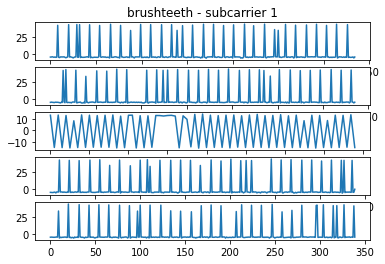

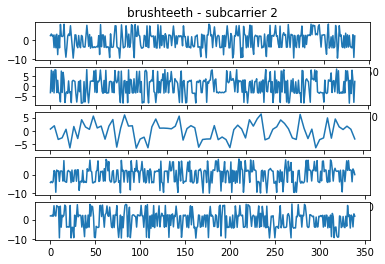

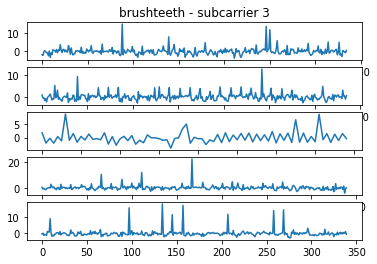

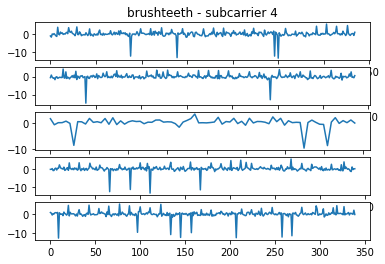

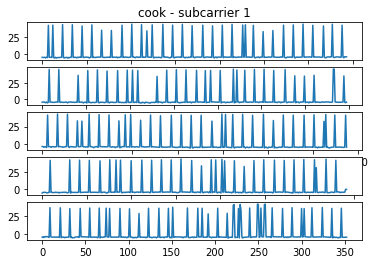

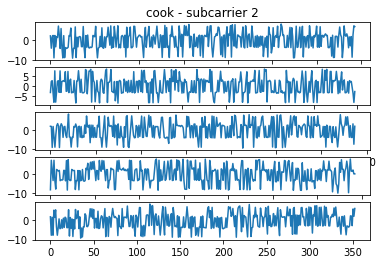

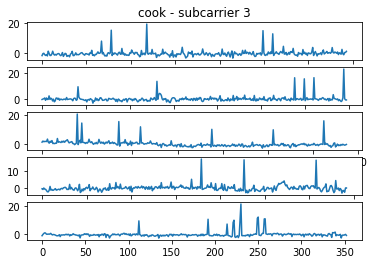

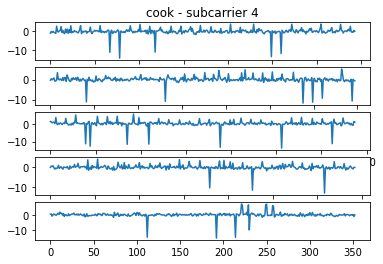

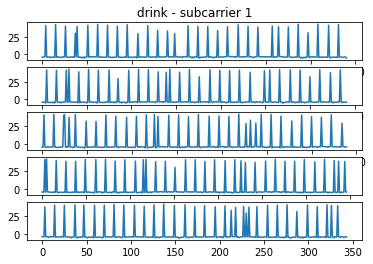

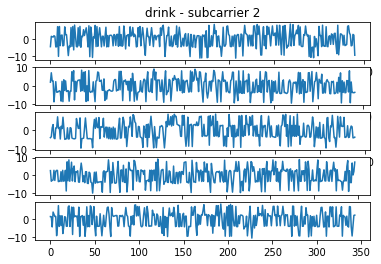

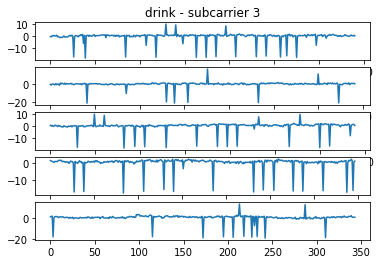

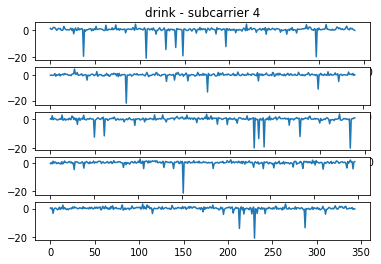

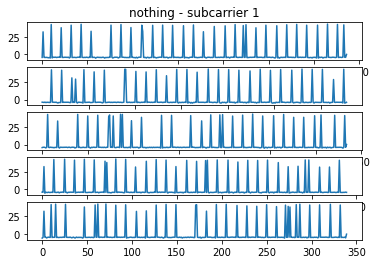

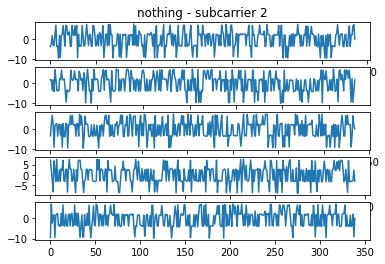

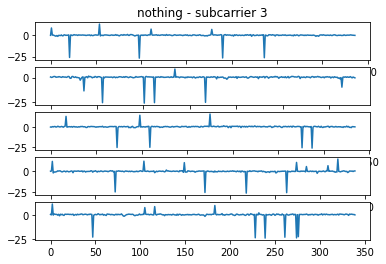

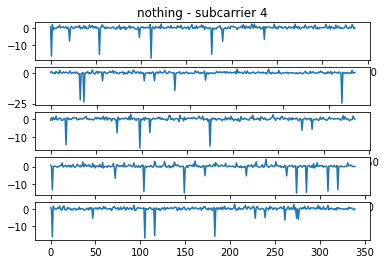

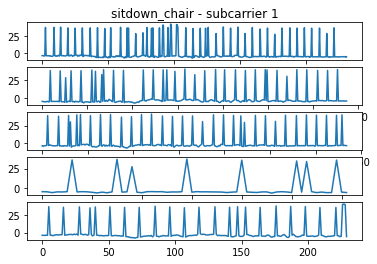

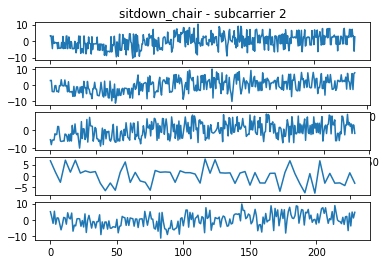

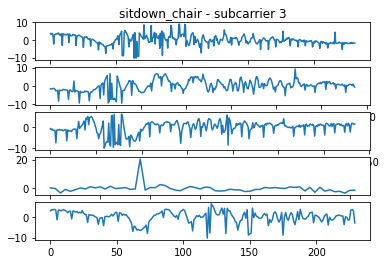

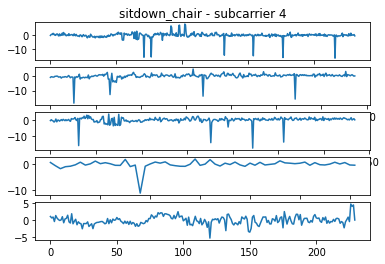

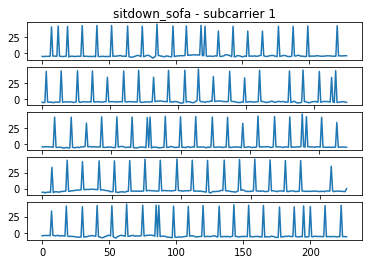

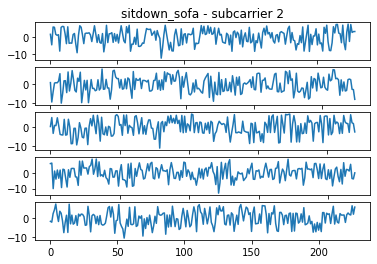

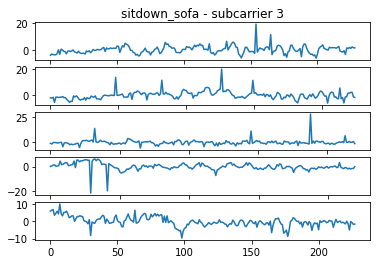

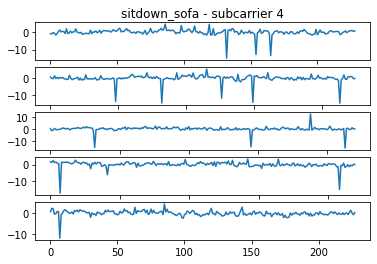

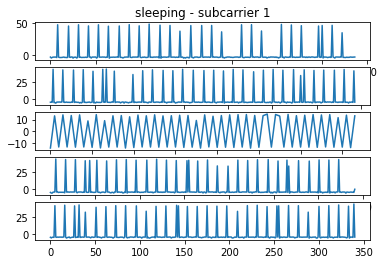

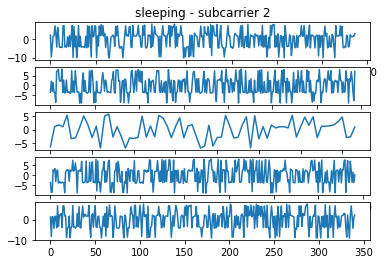

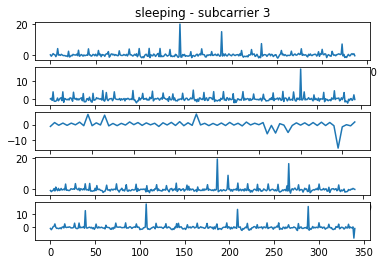

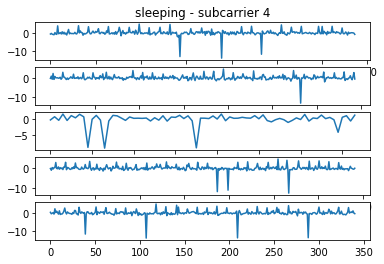

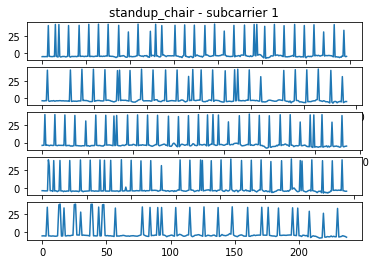

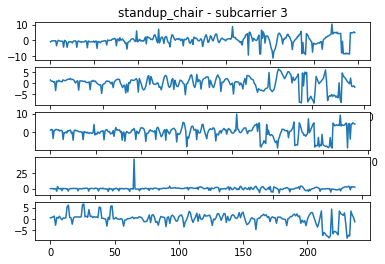

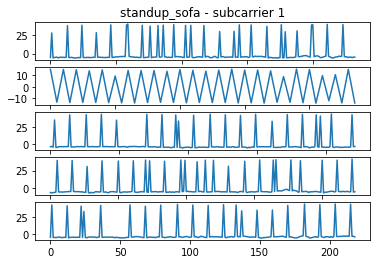

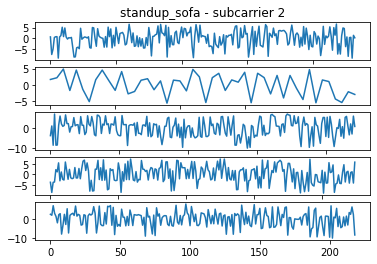

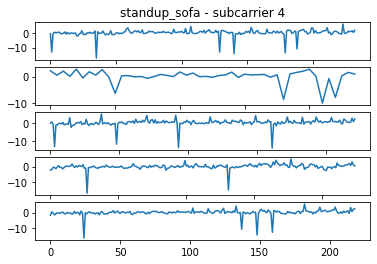

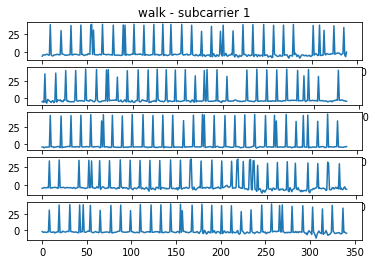

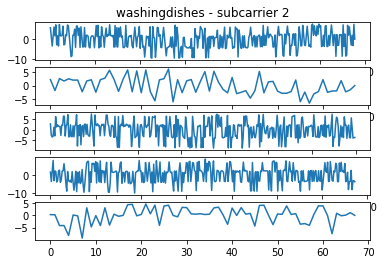

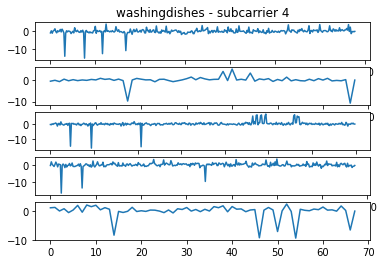

In [14]:
for action in pca_train.keys():
    if len(pca_train[action])<=10:
        continue
    for i in range(4):
        f, ax = plt.subplots(nrows=5)
        ax[0].set_title(action+" - subcarrier "+str(i+1))
        for j in range(5,10):
            pca_train[action][j][i].plot.line(ax=ax[j-5])
        plt.show()

CWT

In [15]:
pca_train[action][0]

0         1         2          3
0    -4.377654  3.367382 -0.033323   0.740482
1    -4.743253 -3.384375  1.065273  -0.263303
2    33.990071  3.038576  3.276055 -14.768930
3    -4.354248  3.494667  0.002505  -0.163652
4    -4.303271  3.563423 -0.020964   0.529625
..         ...       ...       ...        ...
334  41.594845 -2.493330 -3.594398   0.772517
335  -4.120837 -3.424510  0.321008  -0.411794
336  -4.104287 -2.989844  0.315705  -0.656286
337  -3.943160  2.531443  0.246312  -0.614270
338  -3.874495  2.647932 -0.037131   0.031431

[339 rows x 4 columns]

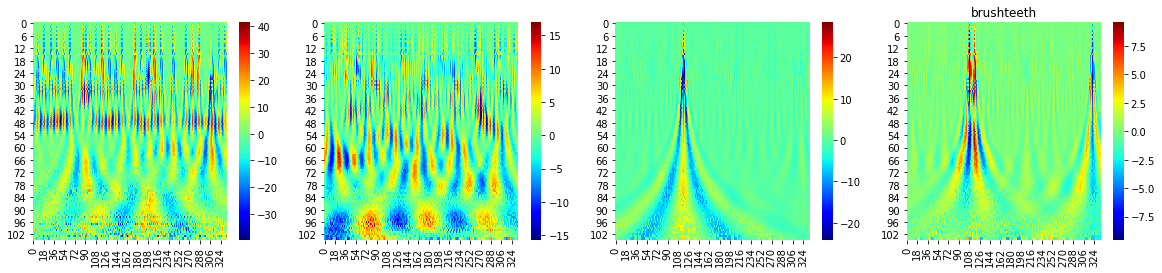

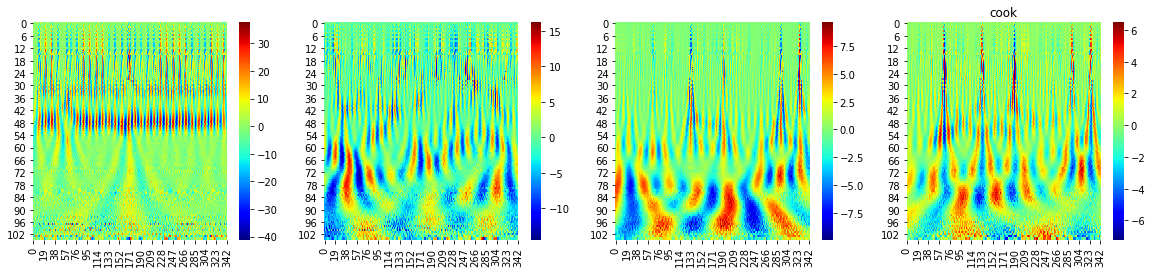

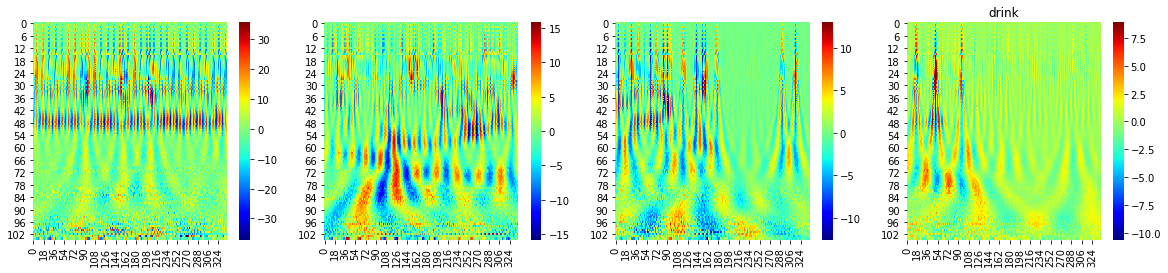

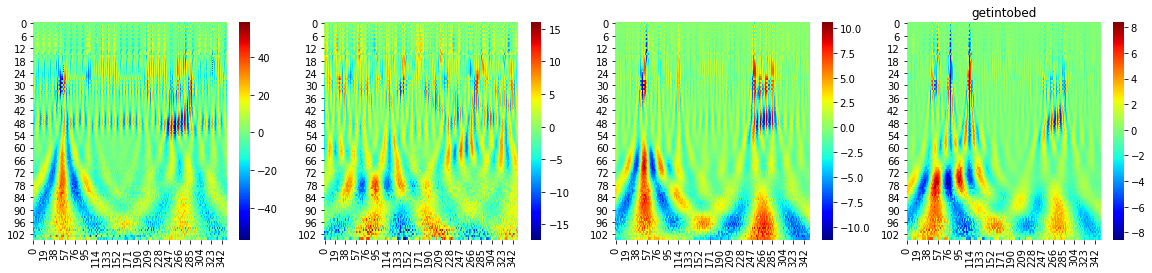

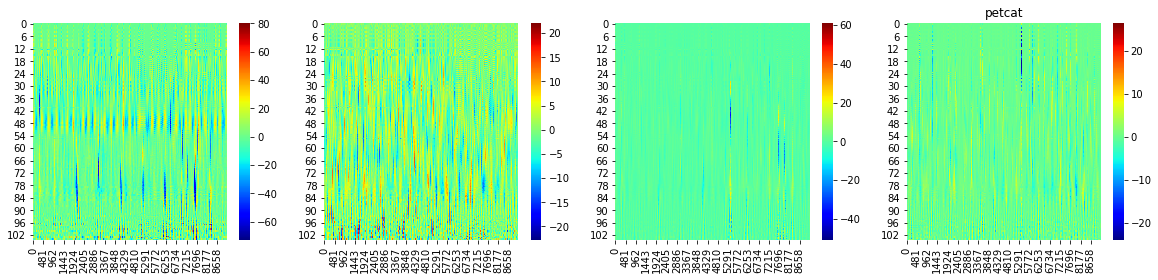

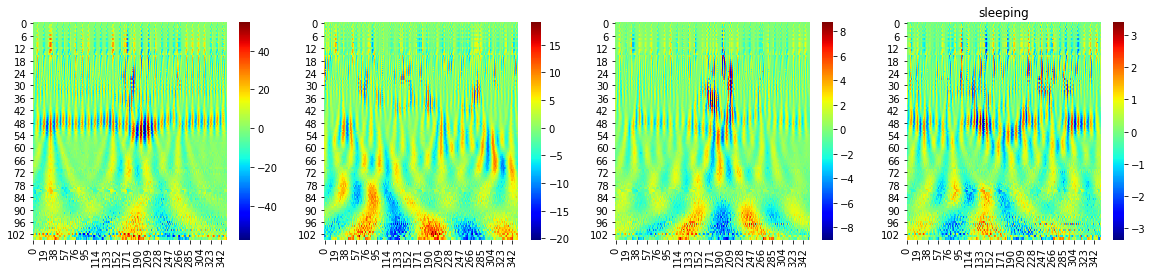

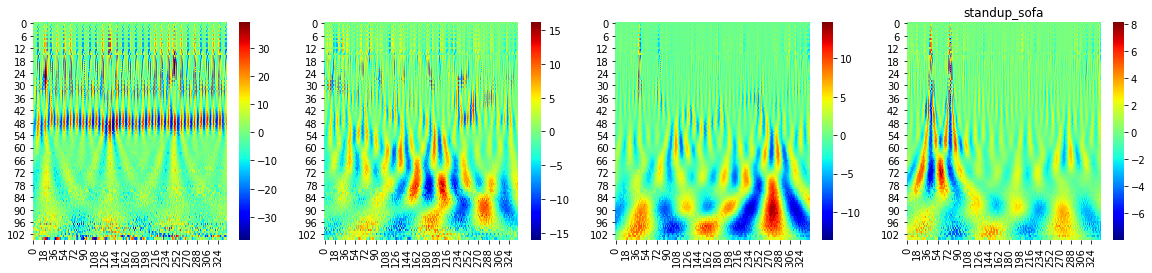

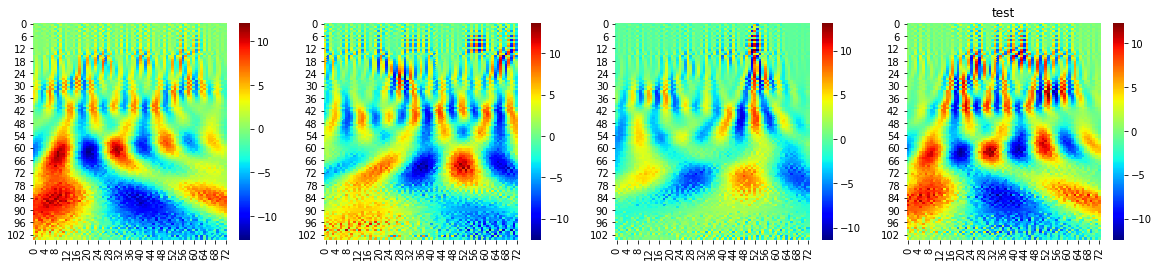

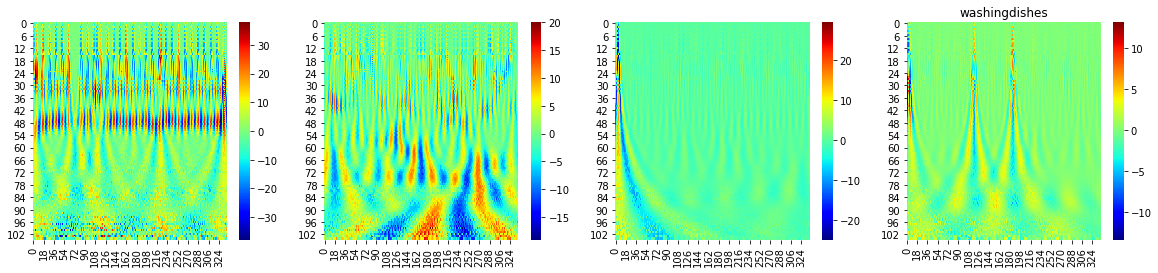

In [21]:
cwt_train={}

N = 7
L = 15
scales = np.array([2 ** (n + (l / L)) for n in range(N) for l in range(L)])

for action in pca_train.keys():
    cwt_train[action]=[]
    for df in pca_train[action]:
        cwts=[]
        for i in range(df.shape[1]):
            coef, freqs=pywt.cwt(df[i], scales,'morl')
            cwts.append(coef)
        if not cwt_train[action]:
            f, ax= plt.subplots(1,len(cwts),figsize=(20,4))
            plt.title(action)
            for i in range(len(cwts)):
                sns.heatmap(cwts[i],ax=ax[i], cmap='jet')
            plt.show()
        cwt_train[action].append(cwts)



In [33]:
cwt_tr_dir='cwt_train/'

for action in cwt_train.keys():
    for i in range(len(cwt_train[action])):
        cwts=cwt_train[action][i]
        matrix=cwts[0]
        for df in cwts[1:]:
            matrix+=df
        pd.DataFrame(matrix).to_csv(join(cwt_tr_dir,action+f"_{i}.csv"),index=False)

    print(action)

        

brushteeth
cook
drink
getintobed
nothing
petcat
sitdown_chair
sitdown_sofa
sleeping
standup_chair
standup_sofa
test
walk
washingdishes


In [34]:
pd.DataFrame(matrix)

0          1          2          3          4          5    \
0     0.838311   4.984306  -4.478332  -4.707515   3.740651   1.139600   
1    -3.718486   0.911242   8.756539  -6.070132  -1.443915   0.378457   
2     2.371848  -9.678327   4.241759   3.731129  -1.331466  -1.177066   
3    -3.201734   4.836622   3.863816  -9.449957   3.417367   0.536281   
4     0.892117  -9.600512  10.995961  -2.769677  -1.046817  -0.632625   
..         ...        ...        ...        ...        ...        ...   
100   3.239443  -6.265558 -15.722195   1.250889 -12.127519  -7.842827   
101  -7.370812  -2.742691 -15.725276  -5.471794 -14.375395  -8.516021   
102 -21.859344  -4.265057  -6.753983  -5.676325 -18.849019  -6.182097   
103 -18.512007  -6.216340  -8.969797 -10.253788  -6.324180  -3.774685   
104   4.150505 -20.197060  10.523710 -19.358965  11.576292 -20.371362   

           6          7          8          9    ...        344        345  \
0    -0.440109  -1.254891  -0.266285   1.395121  ...  -0.398016   2.515700   
1     1.325316  -0.008290  -1.184984  -1.550917  ...  -1.394080   0.076595   
2    -0.171537   0.894244   1.494983  -0.491943  ...   1.999798  -5.717374   
3     0.719758  -0.904118  -0.964263  -0.221390  ...  -2.025771   2.204143   
4     0.698888   0.444896   0.761556  -1.342054  ...   1.616718  -6.322820   
..         ...        ...        ...        ...  ...        ...        ...   
100   1.203384 -21.717418 -10.899585  -1.192660  ...  10.802468  -5.058626   
101  -4.806488 -15.607265  -6.750516 -14.316729  ...   4.947545   4.739065   
102  -1.487324 -19.695749  -1.351329 -19.047393  ...  -4.037184  21.548660   
103 -13.604654  -0.191893  -9.810200  -8.049009  ...  12.981569   3.900211   
104   7.264023 -12.354057   7.264881  -2.406958  ...   2.104861  11.352719   

          346        347        348        349        350        351  \
0   -2.622876  -2.453883   2.965070  -1.651437   0.037372   2.808025   
1    5.195477  -4.470415   0.335824   1.703223  -3.539690   0.398627   
2    3.071683   2.159582  -3.346506   2.933451   0.779037  -2.539859   
3    2.509493  -6.323322   3.898711  -0.213903  -3.233179   2.913138   
4    7.242950  -2.069357  -2.760100   4.419405  -2.028020  -1.596477   
..        ...        ...        ...        ...        ...        ...   
100 -2.324335   7.772013  -0.204307  -0.355241   3.357790   0.294304   
101 -0.259990  12.480400   6.093445   4.142820   5.125835  -2.345011   
102  0.941722  11.872381   4.403586   5.161930  16.638738  -4.579889   
103  3.453545   3.661880  11.191986  10.338583   9.041368  20.335161   
104  5.427747  13.486515   1.989890   4.007117  12.219670   7.276921   

           352        353  
0    -0.509783  -1.133175  
1     1.953275  -0.065794  
2    -0.027700   0.481819  
3     0.722449  -1.099214  
4     1.403645   0.018603  
..         ...        ...  
100   2.902952  -4.897090  
101  12.746488   3.415465  
102  20.952827   2.727613  
103   0.458269  23.597474  
104  15.574901   8.088414  

[105 rows x 354 columns]